In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import os
from PIL import Image
from os.path import join
import Augmentor
from Augmentor.Operations import Operation
import numpy as np
import cv2

from cancer.datasets import get_sipakmed, get_smear
from cancer.visulize import show_image
from cancer.variables import BASE_DATA_DIR

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
class CellAdder(Operation):

    def __init__(self, probability, is_bad_cell):
        Operation.__init__(self, probability)
        self.is_bad_cell = is_bad_cell

    def perform_operation(self, image):
        # image: PIL.Image
        #image_arr = np.array(image).astype('uint8')
        if self.is_bad_cell:
            pass

        return image # image is PIL.Image, same as input

In [12]:
data_path = join(BASE_DATA_DIR, 'SIPaKMeD', 'processed_data', 'test', 'images')
mask_path = join(BASE_DATA_DIR, 'SIPaKMeD', 'processed_data', 'test', 'masks')

pipeline = Augmentor.Pipeline(data_path)
pipeline.ground_truth(mask_path)

pipeline.rotate(probability=0.5, max_left_rotation=25, max_right_rotation=25)
pipeline.flip_left_right(probability=0.5)
pipeline.zoom_random(probability=0.5, percentage_area=0.6)
pipeline.flip_top_bottom(probability=0.5)
pipeline.random_distortion(probability=.5, grid_width=8, grid_height=8, magnitude=6)
pipeline.crop_random(.2, .85)
pipeline.add_operation(CellAdder(probability=.1, is_bad_cell=True))

Initialised with 1 image(s) found.
Output directory set to /Users/seanwade/projects/cancerDetection/data/SIPaKMeD/processed_data/test/images/output.1 ground truth image(s) found.


In [13]:
gen = pipeline.keras_generator(batch_size=1, scaled=False)

images, labels = next(gen)
images, labels = images.squeeze(), labels.squeeze

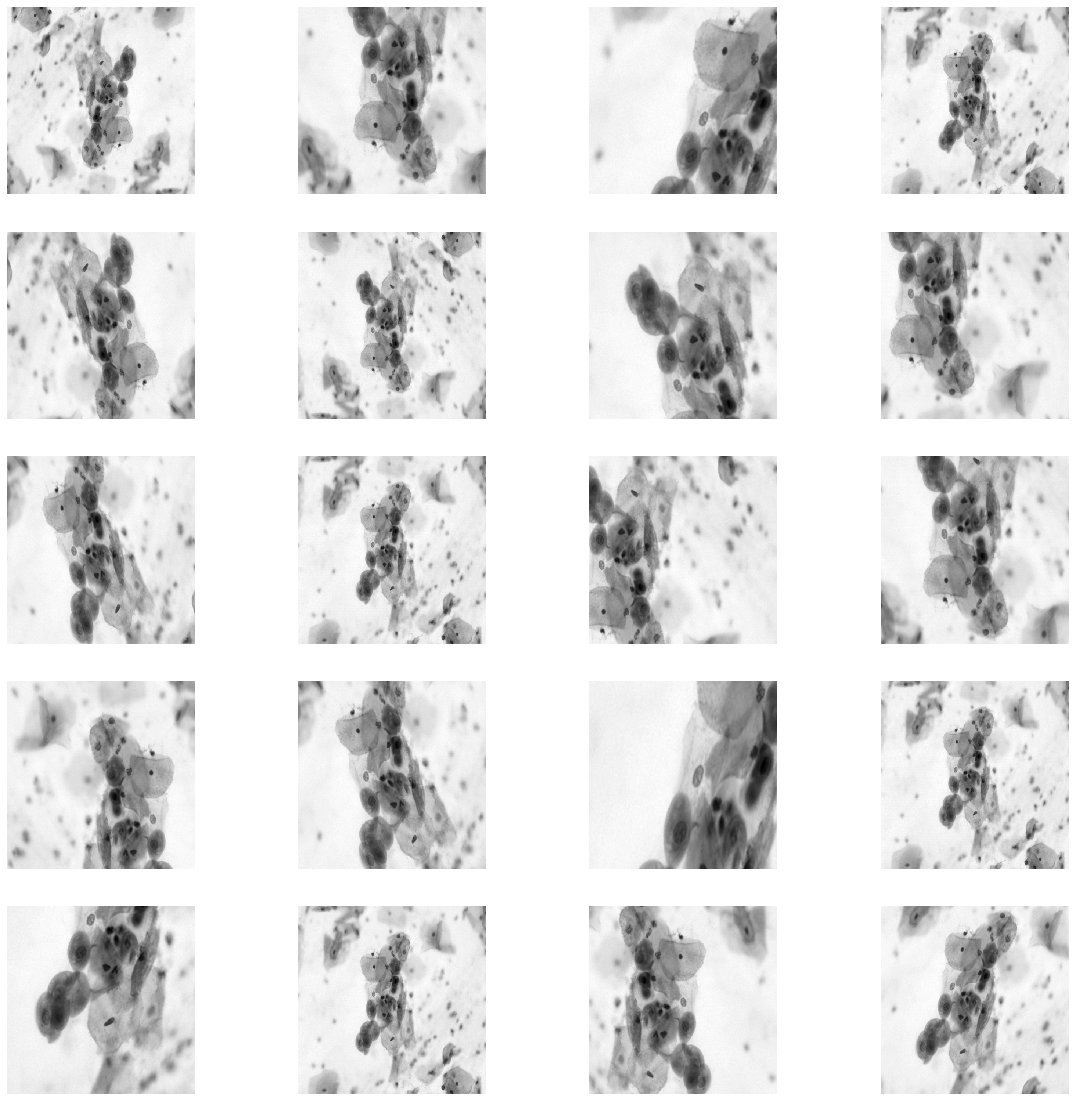

In [14]:
w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    image, label = next(gen)
    image, label = image.squeeze(), label.squeeze()
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

## Animation

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML

In [16]:
%matplotlib inline

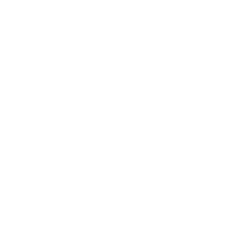

In [27]:
fig = plt.figure()
plt.axis('off')

ims = []
for i in range(300):
    image, label = next(gen)
    image, label = image.squeeze(), label.squeeze()
    im = plt.imshow(image, cmap='gray', animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=1000)
#ani.save('dynamic_images.mp4')

In [28]:
HTML(ani.to_html5_video())